In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
from collections import Counter
from random import randint
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [114]:
df=pd.read_csv('/content/hackathon.csv')
df.head()

,Name,Start Date,Role,Role Level,Vendor,Product,Prod Start Date,Prod End Date,resource product start date,resource product end date,Prod Build Location,Anchor,Work Intake Scoping,Interviewer,Security Maven,Accessibility,DevSecOps,Education Track,Location,E/C,Color (Y/N),Gender,Available for Other areas,Skill 1,Skill 2,Skill 3,Skill 4,Skill 5
0,Resource 2,11/29/17,Engr,Senior,NaN,Product 1,01/04/21,12/24/21,01/04/21,12/24/21,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL,E,N,M,Y,NaN,Cloud,NaN,NaN,NaN
1,Resource 3,01/01/18,Engr,Senior,NaN,Product 2,01/24/21,12/24/21,01/24/21,12/24/21,AZ,Y,NaN,Y,NaN,NaN,NaN,NaN,IL,E,Y,M,N,Legacy Java,Cloud,IBM/Websphere,Angular,NaN
2,Resource 6,01/08/18,Engr,Senior,NaN,Product 3,01/31/21,12/24/21,01/31/21,12/17/21,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL,E,N,M,Y,.NET,Cloud,NaN,NaN,NaN
3,Resource 7,01/08/18,Engr,Senior,NaN,Product 4,02/07/21,05/21/21,02/07/21,05/21/21,IL,Y,NaN,NaN,NaN,NaN,NaN,NaN,IL,E,Y,F,Y,.NET,Cloud,NaN,NaN,NaN
4,Resource 8,01/08/18,Engr,Senior,NaN,Product 5,02/21/21,12/03/21,02/21/21,12/03/21,AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL,E,N,M,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Name', 'Start Date', 'Role', 'Role Level', 'Vendor', 'Product',
       'Prod Start Date', 'Prod End Date', 'resource product start date',
       'resource product end date', 'Prod Build Location', 'Anchor',
       'Work Intake Scoping', 'Interviewer', 'Security Maven', 'Accessibility',
       'DevSecOps', 'Education Track', 'Location', 'E/C', 'Color (Y/N)',
       'Gender', 'Available for Other areas', 'Skill 1', 'Skill 2', 'Skill 3',
       'Skill 4', 'Skill 5'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         171 non-null    object 
 1   Start Date                   171 non-null    object 
 2   Role                         171 non-null    object 
 3   Role Level                   119 non-null    object 
 4   Vendor                       54 non-null     object 
 5   Product                      159 non-null    object 
 6   Prod Start Date              159 non-null    object 
 7   Prod End Date                152 non-null    object 
 8   resource product start date  159 non-null    object 
 9   resource product end date    152 non-null    object 
 10  Prod Build Location          160 non-null    object 
 11  Anchor                       24 non-null     object 
 12  Work Intake Scoping          0 non-null      float64
 13  Interviewer         

In [5]:
df.describe()

,Work Intake Scoping,Skill 5
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


**Gender Diversity**

In [11]:
list(df['Gender'].unique())[:-1]

['M', 'F']

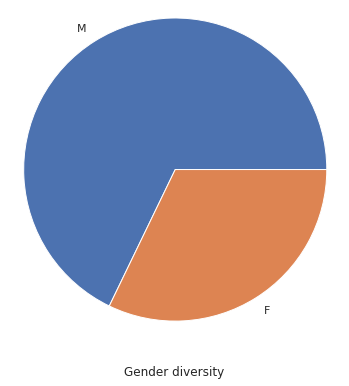

In [13]:
plt.figure(figsize=(6,6))

Gender_df = df['Gender'].value_counts()

plt.title('Gender diversity', y=-0.15)
plt.pie(Gender_df, labels=list(df['Gender'].unique())[:-1]);
plt.axis('equal');

**Skillset of a resource**

In [24]:
skill_columns=['Name','Skill 1', 'Skill 2', 'Skill 3', 'Skill 4', 'Skill 5']
df_skill=df[skill_columns]
df_skill.head()

,Name,Skill 1,Skill 2,Skill 3,Skill 4,Skill 5
0,Resource 2,NaN,Cloud,NaN,NaN,NaN
1,Resource 3,Legacy Java,Cloud,IBM/Websphere,Angular,NaN
2,Resource 6,.NET,Cloud,NaN,NaN,NaN
3,Resource 7,.NET,Cloud,NaN,NaN,NaN
4,Resource 8,NaN,NaN,NaN,NaN,NaN


In [134]:
resource_name = input ("Enter a Name of the resource: ")

Enter a Name of the resource: Resource 6


In [135]:
df_skill[df_skill['Name'] == resource_name ]

,Name,Skill 1,Skill 2,Skill 3,Skill 4,Skill 5
2,Resource 6,.NET,Cloud,NaN,NaN,NaN


**Security Maven on a product**

In [42]:
sm_columns=['Name','Product','Security Maven']
df_sm=df[sm_columns]
df_sm.head()

,Name,Product,Security Maven
0,Resource 2,Product 1,NaN
1,Resource 3,Product 2,NaN
2,Resource 6,Product 3,NaN
3,Resource 7,Product 4,NaN
4,Resource 8,Product 5,NaN


In [43]:
security_maven = input ("Enter product name: ")
security_maven=security_maven.strip()

Enter product name: Product 6


In [44]:
df_sm[df_sm['Product'] == security_maven ]

,Name,Product,Security Maven
5,Resource 9,Product 6,Y
14,Resource 20,Product 6,NaN
28,Resource 34,Product 6,NaN
50,Resource 56,Product 6,NaN
64,Resource 70,Product 6,NaN
74,Resource 81,Product 6,NaN
90,Resource 104,Product 6,NaN
106,Resource 127,Product 6,NaN
128,Resource 156,Product 6,NaN
132,Resource 160,Product 6,NaN


**PM, UX or Anchor on a Product**

In [48]:
role_columns=['Name','Product','Role','Anchor']
df_role=df[role_columns]
df_role.head()

,Name,Product,Role,Anchor
0,Resource 2,Product 1,Engr,NaN
1,Resource 3,Product 2,Engr,Y
2,Resource 6,Product 3,Engr,NaN
3,Resource 7,Product 4,Engr,Y
4,Resource 8,Product 5,Engr,NaN


In [49]:
product_name = input ("Enter product name: ")
product_name=product_name.strip()

Enter product name: Product 11


In [47]:
df_role[df_role['Product'] == product_name ]

,Name,Product,Role
11,Resource 16,Product 11,Engr
31,Resource 37,Product 11,PM
40,Resource 46,Product 11,Engr
55,Resource 61,Product 11,Engr
69,Resource 75,Product 11,Engr
79,Resource 86,Product 11,UX
95,Resource 110,Product 11,Engr
114,Resource 139,Product 11,Engr
135,Resource 163,Product 11,Engr
158,Resource 186,Product 11,UX


In [62]:
df_role[(df_role.Product == product_name) & (df_role.Role != 'Engr')]
df_role[df_role.Role != 'Engr']

,Name,Product,Role,Anchor
4,Resource 8,Product 5,Engr,NaN
10,Resource 15,Product 4,PM,NaN
12,Resource 17,Product 5,PM,NaN
14,Resource 20,Product 6,PM,NaN
15,Resource 21,Product 1,UX,NaN
...,...,...,...,...
201,NaN,NaN,NaN,NaN
202,NaN,NaN,NaN,NaN
203,NaN,NaN,NaN,NaN
204,NaN,NaN,NaN,NaN


**How many contractor resources? Vendor-wise, Location-wise**

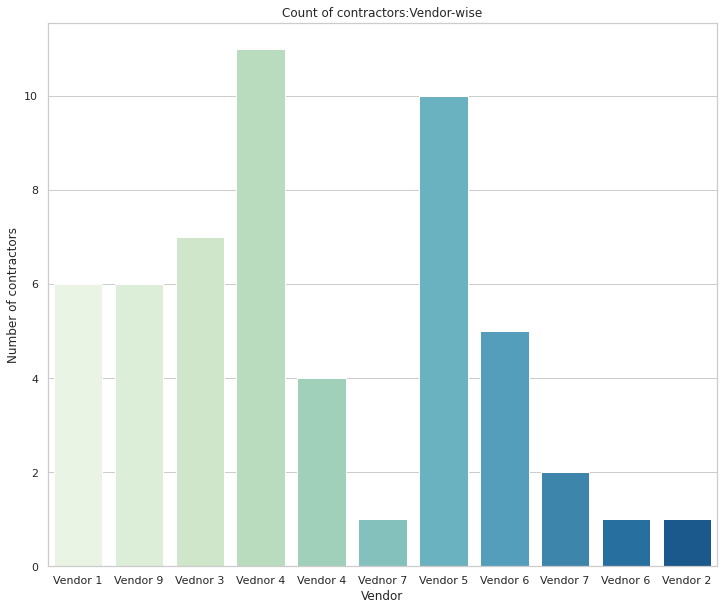

In [69]:
f, ax = plt.subplots(figsize=(12, 10))

sns.countplot(x="Vendor", data=df[df['E/C'] == 'C' ], palette = 'GnBu')
ax.set(xlabel='Vendor', ylabel='Number of contractors',title='Count of contractors:Vendor-wise')
plt.show()

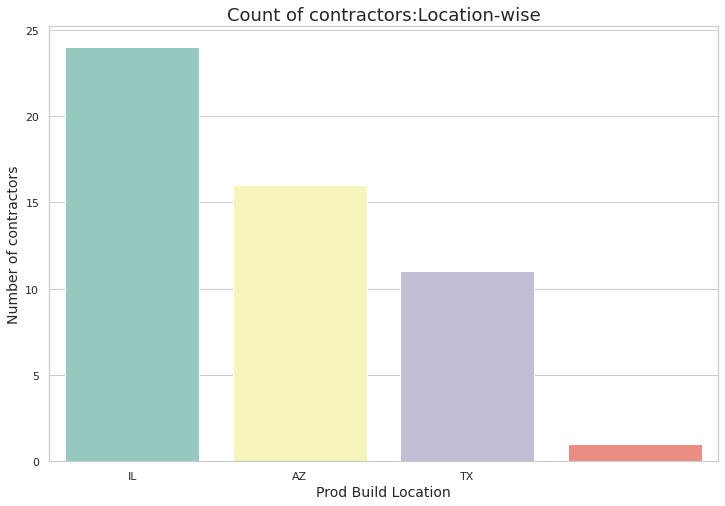

In [70]:
plt.figure(figsize = (12, 8))

ax = sns.countplot(x='Prod Build Location', data=df[df['E/C'] == 'C' ], palette = 'Set3',order = df['Prod Build Location'].value_counts().index)
ax.set_xlabel(xlabel = 'Prod Build Location', fontsize = 14)
ax.set_ylabel(ylabel = 'Number of contractors', fontsize = 14)
ax.set_title(label = 'Count of contractors:Location-wise', fontsize = 18)
plt.show()


**What is the PM to UX to Engr ratio?**

In [76]:
df['Role'] = df['Role'].str.strip()

In [78]:
s=df.Role.value_counts(normalize=True,sort=False).mul(100) # mul(100) is == *100
s.index.name,s.name='Role','Ratio' #setting the name of index and series
print(s.to_frame()) #series.to_frame() returns a dataframe

          Ratio
Role           
UX    16.374269
Engr  69.590643
PM    14.035088


**Location-wise resources – PMs, UXs, Engrs**

In [108]:
df_loc=df.dropna(subset = ['Role', 'Prod Build Location'])
df_loc['Prod Build Location'] = df_loc['Prod Build Location'].str.strip()
df_loc['Role'] = df_loc['Role'].str.strip()
df_loc

,Name,Start Date,Role,Role Level,Vendor,Product,Prod Start Date,Prod End Date,resource product start date,resource product end date,Prod Build Location,Anchor,Work Intake Scoping,Interviewer,Security Maven,Accessibility,DevSecOps,Education Track,Location,E/C,Color (Y/N),Gender,Available for Other areas,Skill 1,Skill 2,Skill 3,Skill 4,Skill 5
0,Resource 2,11/29/17,Engr,Senior,NaN,Product 1,01/04/21,12/24/21,01/04/21,12/24/21,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL,E,N,M,Y,NaN,Cloud,NaN,NaN,NaN
1,Resource 3,01/01/18,Engr,Senior,NaN,Product 2,01/24/21,12/24/21,01/24/21,12/24/21,AZ,Y,NaN,Y,NaN,NaN,NaN,NaN,IL,E,Y,M,N,Legacy Java,Cloud,IBM/Websphere,Angular,NaN
2,Resource 6,01/08/18,Engr,Senior,NaN,Product 3,01/31/21,12/24/21,01/31/21,12/17/21,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL,E,N,M,Y,.NET,Cloud,NaN,NaN,NaN
3,Resource 7,01/08/18,Engr,Senior,NaN,Product 4,02/07/21,05/21/21,02/07/21,05/21/21,IL,Y,NaN,NaN,NaN,NaN,NaN,NaN,IL,E,Y,F,Y,.NET,Cloud,NaN,NaN,NaN
4,Resource 8,01/08/18,Engr,Senior,NaN,Product 5,02/21/21,12/03/21,02/21/21,12/03/21,AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL,E,N,M,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Resource 190,04/19/21,Engr,Mid,NaN,Product 12,03/01/21,10/29/21,04/19/21,10/29/21,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AZ,E,Y,F,NaN,.NET,Cloud,NaN,NaN,NaN
163,Resource 191,04/26/21,PM,NaN,Vednor 6,Product 6,02/28/21,12/17/21,02/28/21,12/17/21,AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL,C,Y,F,NaN,Mainframe,Cloud,NaN,NaN,NaN
164,Resource 192,04/19/21,Engr,Mid,Vendor 5,Product 13,03/08/21,12/24/21,04/19/21,12/24/21,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,C,N,M,NaN,NaN,NaN,NaN,NaN,NaN
167,Resource 195,04/26/21,Engr,Mid,Vendor 9,Product 15,03/22/21,09/24/21,04/26/21,09/24/21,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL,C,N,F,NaN,Legacy Java,Cloud,SiteMinder,NaN,NaN


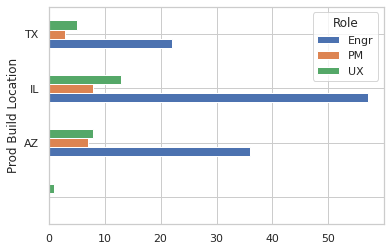

In [109]:
df_loc.groupby('Prod Build Location').Role.value_counts().unstack().plot.barh()

**Need 1 intermediate 1 junior, 2 senior resource available for new products starting on May 15 2021 for build location in IL? (Hint: Resources have to be found based on product end-date closest to May 15 2021, their level and their location)**

In [110]:
df['Prod Build Location']=df['Prod Build Location'].str.strip()
df_IL= df[df['Prod Build Location'] == 'IL']
df_IL.head()

,Name,Start Date,Role,Role Level,Vendor,Product,Prod Start Date,Prod End Date,resource product start date,resource product end date,Prod Build Location,Anchor,Work Intake Scoping,Interviewer,Security Maven,Accessibility,DevSecOps,Education Track,Location,E/C,Color (Y/N),Gender,Available for Other areas,Skill 1,Skill 2,Skill 3,Skill 4,Skill 5
0,Resource 2,11/29/17,Engr,Senior,NaN,Product 1,01/04/21,12/24/21,01/04/21,12/24/21,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL,E,N,M,Y,NaN,Cloud,NaN,NaN,NaN
2,Resource 6,01/08/18,Engr,Senior,NaN,Product 3,01/31/21,12/24/21,01/31/21,12/17/21,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL,E,N,M,Y,.NET,Cloud,NaN,NaN,NaN
3,Resource 7,01/08/18,Engr,Senior,NaN,Product 4,02/07/21,05/21/21,02/07/21,05/21/21,IL,Y,NaN,NaN,NaN,NaN,NaN,NaN,IL,E,Y,F,Y,.NET,Cloud,NaN,NaN,NaN
6,Resource 10,01/29/18,Engr,Senior,NaN,Product 7,03/14/21,11/19/21,03/14/21,11/19/21,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL,E,N,M,Y,.NET,Cloud,NaN,NaN,NaN
8,Resource 13,03/05/18,Engr,Senior,NaN,Product 9,04/05/21,12/31/21,04/05/21,12/31/21,IL,Y,NaN,NaN,NaN,NaN,Y,NaN,IL,E,N,M,N,NaN,NaN,NaN,NaN,NaN


In [120]:
df_IL= df[df['Prod Start Date'] > '05/15/21']


,Name,Start Date,Role,Role Level,Vendor,Product,Prod Start Date,Prod End Date,resource product start date,resource product end date,Prod Build Location,Anchor,Work Intake Scoping,Interviewer,Security Maven,Accessibility,DevSecOps,Education Track,Location,E/C,Color (Y/N),Gender,Available for Other areas,Skill 1,Skill 2,Skill 3,Skill 4,Skill 5,prod_days


**Alert on product missing end date despite it is going on for one month?**

In [118]:
df['Prod Start Date'] = pd.to_datetime(df['Prod Start Date'])
df['Prod End Date'] = pd.to_datetime(df['Prod End Date'])
df['prod_days'] = (df['Prod End Date'] - df['Prod Start Date']).dt.days
df.head()

,Name,Start Date,Role,Role Level,Vendor,Product,Prod Start Date,Prod End Date,resource product start date,resource product end date,Prod Build Location,Anchor,Work Intake Scoping,Interviewer,Security Maven,Accessibility,DevSecOps,Education Track,Location,E/C,Color (Y/N),Gender,Available for Other areas,Skill 1,Skill 2,Skill 3,Skill 4,Skill 5,prod_days
0,Resource 2,11/29/17,Engr,Senior,NaN,Product 1,2021-01-04,2021-12-24,01/04/21,12/24/21,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL,E,N,M,Y,NaN,Cloud,NaN,NaN,NaN,354.0
1,Resource 3,01/01/18,Engr,Senior,NaN,Product 2,2021-01-24,2021-12-24,01/24/21,12/24/21,AZ,Y,NaN,Y,NaN,NaN,NaN,NaN,IL,E,Y,M,N,Legacy Java,Cloud,IBM/Websphere,Angular,NaN,334.0
2,Resource 6,01/08/18,Engr,Senior,NaN,Product 3,2021-01-31,2021-12-24,01/31/21,12/17/21,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL,E,N,M,Y,.NET,Cloud,NaN,NaN,NaN,327.0
3,Resource 7,01/08/18,Engr,Senior,NaN,Product 4,2021-02-07,2021-05-21,02/07/21,05/21/21,IL,Y,NaN,NaN,NaN,NaN,NaN,NaN,IL,E,Y,F,Y,.NET,Cloud,NaN,NaN,NaN,103.0
4,Resource 8,01/08/18,Engr,Senior,NaN,Product 5,2021-02-21,2021-12-03,02/21/21,12/03/21,AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL,E,N,M,NaN,NaN,NaN,NaN,NaN,NaN,285.0


In [128]:
df_alert=df[df['prod_days'] > 30]

df_alert = df_alert[['Product','Prod Start Date','Prod End Date','prod_days']]

df_alert.head()

,Product,Prod Start Date,Prod End Date,prod_days
0,Product 1,2021-01-04,2021-12-24,354.0
1,Product 2,2021-01-24,2021-12-24,334.0
2,Product 3,2021-01-31,2021-12-24,327.0
3,Product 4,2021-02-07,2021-05-21,103.0
4,Product 5,2021-02-21,2021-12-03,285.0


**Resource ready for next rotation? (Hint: Identify folks working longest on product based on their resource product start date compared to current date?)**

In [131]:
from datetime import date, datetime
df['Start Date'] = pd.to_datetime(df['Start Date'])

df['resource_days'] = (pd.Timestamp.now().floor('d') - df['Start Date']).dt.days

df_rotation = df[['Name','Product','Start Date','resource_days']]
df_rotation.head()

,Name,Product,Start Date,resource_days
0,Resource 2,Product 1,2017-11-29,1256.0
1,Resource 3,Product 2,2018-01-01,1223.0
2,Resource 6,Product 3,2018-01-08,1216.0
3,Resource 7,Product 4,2018-01-08,1216.0
4,Resource 8,Product 5,2018-01-08,1216.0


Finding top 20 longest working reources

In [136]:
df_rotation_next=df_rotation.nlargest(20, 'resource_days')
df_rotation_next=df_rotation_next[['Name','Product','Start Date','resource_days']]

df_rotation_next.resource_days = df_rotation_next.resource_days.astype(int)

df_rotation_next.style.background_gradient('inferno')

,Name,Product,Start Date,resource_days
0,Resource 2,Product 1,2017-11-29 00:00:00,1256
1,Resource 3,Product 2,2018-01-01 00:00:00,1223
2,Resource 6,Product 3,2018-01-08 00:00:00,1216
3,Resource 7,Product 4,2018-01-08 00:00:00,1216
4,Resource 8,Product 5,2018-01-08 00:00:00,1216
5,Resource 9,Product 6,2018-01-22 00:00:00,1202
6,Resource 10,Product 7,2018-01-29 00:00:00,1195
7,Resource 11,Product 8,2018-02-26 00:00:00,1167
8,Resource 13,Product 9,2018-03-05 00:00:00,1160
9,Resource 14,Product 10,2018-03-05 00:00:00,1160
